# **sits.rep - Automatização da Organização e Reprodução das Análises de Uso e Cobertura da Terra**

O sits.rep é um pacote desenvolvido na linguagem R com o objetivo de reproduzir os experimentos executados com o pacote sits. Além disso, ele organiza automaticamente os experimentos em uma estrutura de árvore de dependências possibilitando que o usuário execute diversos experimentos e use seus resultados como entrada para novos experimentos. 

Abaixo será apresentada uma seção de Instalação no qual irá informar depêndencias necessárias para usar o pacote sits.rep. Após isso, será demonstrado uma seção, chamado de Script Não Reprodutível, no qual um script de classificação executado diretamento pelo sits e que não é possível obter o mesmo resultado caso seja executado mais de uma vez. Para que se possa reproduzir, será demonstrado uma seção, chamado de Script Reprodutível, que irá executar esse mesmo script com o sits.rep e possibilitará reproduzir essa classificação.

<!-- 
permite o encadeamento dos experimentos em uma árvore de dependências possibilitando que os

Este Jupyter Notebook tem objetivo de auxiliar a instaladação das dependências daqueles interessados no pacote sits.rep. No final, será realizado uma demonstração de uso do pacote, reproduzindo um script não reprodutível. -->

<!-- A reprodutibilidade é uma condição da pesquisa científica com o propósito de garantir que os resultados observados nos experimentos originais sejam os mesmos quando são validados por pessoas distintas. Esse princípio permite qualquer pessoa recriar os experimentos produzidos e avançar o conhecimento sobre um determinado assunto, validando ou não as hipóteses descritas na pesquisa. Entretanto, alguns estudos apontam a existência de pesquisas científicas publicadas e revisadas por pares não reproduzíveis, criando uma preocupação na comunidade científica. Estes estudos alegam falta de rigor técnico e transparência sobre os dados e métodos usados durante o desenvolvimento dos experimentos.

Para lidar com esses problemas, a comunidade científica desenvolveram documentos de boas práticas e ferramentas computacionais para auxiliar os pesquisadores a organizar e compartilhar dados, códigos e artefatos de suas publicações. Essas ferramentas, em geral, lidam com a reprodutibilidade após finalizado o desenvolvimento de todos os experimentos. Entretando, as pesquisas atuais possuem diversos passos e fases de experimentação que podem gerar bifurcações com experimentos e resultados distintos a cada execução. Se esse processo não for tratado durante o desenvolvimento dos experimentos, ou por ventura perder os códigos ou dados usados para produzir um determinado experimento, ao publicar a pesquisa não será possível reproduzir as análises finais. Por tanto, é de suma importância tratar a reprodutibilidade durante o desenvolvimento da pesquisa, e não somente no final do processo.

Esse trabalho trata a questão da reprodutibilidade durante o processo de desenvolvimento da pesquisa, focando a sua metodologia no pacote sits desenvolvido no Instituto Nacional de Pesquisas Espaciais (INPE). Esse pacote é escrito na linguagem R e têm o propósito de centralizar um conjunto de ferramentas para permitir análises de séries temporais de imagens de satélite de uso e cobertura da terra. Dentro de seu escopo é possível realizar desde visualizações, suavizações e clusterizações até classificações de séries temporais usando algoritmos de aprendizagem de máquina. 

Por tanto, o objetivo desse trabalho é criar uma metodologia para sistematizar a organização e armazenamento de dados e metadados durante o desenvolvimento de pesquisas que faz uso do pacote sits. Além disso, através desses dados e metados, permitir a reprodutibilidade dos experimentos escolhidos pelos pesquisadores.  -->

<!-- A reprodutibilidade é um tópico de grande discussão no meio acadêmico nos últimos anos. Isso ocorre devido existir experimentos de pesquisas científicas revisadas por pares não reprodutíveis. Dentre os diversos motivos apontados, estão a falta de rigor técnico e transparência sobre os dados e métodos usados durante o desenvolvimento dos experimentos.

Para lidar com esses problemas, a comunidade científica desenvolveram documentos de boas práticas e ferramentas computacionais para auxiliar os pesquisadores a organizar e compartilhar dados, códigos e artefatos de suas publicações. Porém, em geral essas ferramentas computacionais lidam de forma estática com os experimentos científicos. Ou seja, quando todo o processo é finalizado e possuí um único fluxo de processamento que gera um resultado final. Isso faz com que os pesquisadores precisem finalizar a pesquisa antes de conseguir reproduzir todos os resultados. 

Em ambiente onde a análise de dados é um processo dinâmico, no qual um experimento pode gerar diversos outros experimentos, pode-se acabar perdendo os processos que levaram a gerar algum resultado. Por isso, é de suma importância desenvolver ferramentas que automatizem esse processo de organização de metadados dos experimentos, para que ao final do processo da pesquisa possa ser possível reproduzir em sua totalidade os resultados dos experimentos.
 -->



<!-- 


No âmbito 


os pesquisadores têm discutidos formas automatizadas para facilitar o compartilhamento e a execução das análises das pesquisas. 



compartilhar dados 


Isso ocorre ao fato de ser um pilar do método científico, 


Ela é uma condição da pesquisa científica com o propósito de garantir que os resultados observados nos experimentos originais sejam os mesmos quando são validados por pessoas distintas. 



Isso ocorre devido a sua importância ao método científico, e consequentemente as pesquisas científicas, o que incentiva aos cientistas a aprimorarem 



Devido ao grande volume de dados usadas nas análises científicas, 



Isso ocorre ao fato dá credibilidade ao método científico, e consequentemente as pesquisas científicas, 


e a sistematização das análises de dados, 



Isso ocorre devido a sua importância 


a reprodutibilidade dá credibilidade ao método científico, e consequentimente as pesquisas científicas. 



Isso ocorre devido a sua importância 

Devido a sua importância para garantir 
 -->



<!-- A reprodutibilidade das pesquisas científicas tem sido um tópico de grande discussão no meio acadêmico. A sua importância é discutida em todas as ciências, dado que é um dos pilares do método científico, com o objetivo de garantir a verificação e confiabilidade da metodologia e dos resultados produzidos em uma pesquisa. Apesar de sua importância, diversos trabalhos das mais variadas áreas da ciência têm apontado dificuldades em reproduzir trabalhos científicos, revelando uma possível crise na reprodutibilidade. Na área de economia, por exemplo, o trabalho de Gertler concluiu que, dos 203 artigos empíricos analisados, somente 14\% foram possíveis de replicação. Um dos problemas apontado por Gertler foi a falta de disponibilização aberta dos códigos e dados para reproduzir os resultados.  -->

## **Instalação**

Inicialmente, é preciso instalar o pacote sits. Alguns pacotes de terceiros **DEVEM** ser instalados previamente antes de iniciar a instalação do sits, são elas:
- Python 3.6.8 (https://www.python.org/ftp/python/3.6.8/Python-3.6.8.tgz)
- Tensorflow 1.9 (pip3.6 install --ignore-installed --upgrade tensorflow==1.9.0)
- h5py (pip3.6 install --ignore-installed h5py)
- GEOS 3.7.1 (download.osgeo.org/geos/geos-3.7.1.tar.bz2)
- Proj 5.2 (download.osgeo.org/proj/proj-5.2.0.tar.gz)
- HDF5 1.10.4 (https://support.hdfgroup.org/ftp/HDF5/releases/hdf5-1.10/hdf5-1.10.4/src/hdf5-1.10.4.tar.bz2)
- GDAL 2.4.2 (download.osgeo.org/gdal/2.4.2/gdal-2.4.2.tar.gz)
- Dependências do sf (https://github.com/r-spatial/sf)

É aconselhável instalar as depêndencias na ordem informada. Outras depêndencias são necessárias, mas essas são instaladas no próprio R. 

In [ ]:
install.packages('lwgeom')
install.packages('tidyverse')
install.packages('rgeos')
install.packages('rversions')
install.packages('roxygen2')

install.packages('devtools')
devtools::install_version('sf', '0.7-7', upgrade = FALSE, force=TRUE)
devtools::install_version('raster', '2.9-23', upgrade = FALSE, force=TRUE)
devtools::install_github("e-sensing/wtss")
devtools::install_github("pedro-andrade-inpe/sits.validate",  upgrade = FALSE, force=TRUE)
devtools::install_github("e-sensing/inSitu",  upgrade = FALSE, force=TRUE)
devtools::install_github("e-sensing/lucCalculus",  upgrade = FALSE, force=TRUE)

A versão do sits usada nesse exemplo e aceita pelo sits.rep é a versão 1.12.6. Por tanto, é necessário especificar a versão do commit específica da versão 1.12.6.
Abaixo, segue o código R para a instalação do sits:

In [ ]:
devtools::install_github('e-sensing/sits', ref ='d92bdc2f9b0f6158a8ae7ae8b7e4544fcca8390a',  upgrade = FALSE)

Agora, basta importar o pacote sits para o ambiente R:

In [7]:
library(sits)

sits - satellite image time series analysis.
Loaded sits v1.12.6. See ?sits for help, citation("sits") for use in publication.
                See demo(package = "sits") for examples.
Created logger for sits package - DEBUG level at /tmp/RtmpjxEfxc/sits_debug32dd7e51fcbc.log
Created logger for sits package - ERROR level at /tmp/RtmpjxEfxc/sits_error32dd5491b2b6.log


Depois disso, basta instalar o pacote sits.rep:

In [ ]:
devtools::install_github('https://github.com/RafaMariano/sits.rep')

<!--  -->

## **Script Não Reprodutível**

Um script de classificação com o pacote sits deverá conter, no mínimo, cinco etapas que abrange desde a obtenção das amostras até a classificação de um conjunto de séries temporais de imagens de satélites. A seguir, serão abordadas cada uma dessas cinco etapas:


<!-- Um script de classificação usando o sits deve conter, no mínimo, cinco etapas: -->
- [Obteção das amostras](#Obtenção-das-Amostras);
- [Definição do modelo](#Definição-do-Modelo);
- [Treinamento do Modelo](#Treinamento-do-Modelo);
- [Definição da coverage](#Definição-da-coverage);
- [Classificação](#Classificação).

<!-- Cada uma dessas etapas serão especificado a seguir. -->

## Obtenção das Amostras

 As amostras usadas dentro do projeto e-sensing e de outros grupos de pesquisas são obtidas através do pacote inSitu (https://github.com/e-sensing/inSitu). Este pacote disponibiliza diversos conjuntos de amostras validadas de séries temporais da região da Amazônia e Cerrado. Para usá-la no R, basta importá-lo usando o comando 'library':
 
 
<!--  Além disso, possuí total integração com o pacote sits devido os dados de amostra estarem no formato sits.tibble. Dessa forma, basta importar o pacote usando o comando R 'library(inSitu)' e -->


<!--  Para treinar um modelo com o sits, é necessário informar um conjunto de amostras de séries temporais no formato sits.tibble. O pacote inSitu (https://github.com/e-sensing/inSitu) fornece amostras da região da Amazonia, Cerrado e do Mato Grosso neste formato específico, além disso todos os dados disponibilizados são usados constantemente dentro do projeto e-sensing, por tanto, são confiáveis. -->

<!--  Para começar a usar o pacote, basta importar utilizando o 'library': -->


In [2]:
library(inSitu)

Loaded inSitu e-sensing data sets v1.1.1. Use citation("inSitu") for use in publication.


Cada conjunto de amostras do pacote inSitu possuí um identificador único. Neste exemplo, será usado amostras do Estado do Mato Grosso (Brasil), identificado pela variável 'br_mt_1_8K_9classes_6bands'. Para mais informações sobre os indentificadores únicos das amostras, acesse o GitHub (https://github.com/e-sensing/inSitu) do projeto.

In [3]:
data("br_mt_1_8K_9classes_6bands")

br_mt_1_8K_9classes_6bands[1,]

id_sample,cluster_label,longitude,latitude,start_date,end_date,label,coverage,time_series
<int>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<list>
1,Pasture,-55.1852,-10.8378,2013-09-14,2014-08-29,Pasture,MOD13Q1,"15962.0000, 15978.0000, 15994.0000, 16010.0000, 16026.0000, 16042.0000, 16058.0000, 16071.0000, 16087.0000, 16103.0000, 16119.0000, 16135.0000, 16151.0000, 16167.0000, 16183.0000, 16199.0000, 16215.0000, 16231.0000, 16247.0000, 16263.0000, 16279.0000, 16295.0000, 16311.0000, 0.3067, 0.1697, 0.2050, 0.1036, 0.1051, 0.1885, 0.0507, 0.1027, 0.1393, 0.1852, 0.2035, 0.0837, 0.1087, 0.1134, 0.0882, 0.1171, 0.1340, 0.1370, 0.1685, 0.1545, 0.1979, 0.1861, 0.2239, 0.0538, 0.0277, 0.0354, 0.0244, 0.0275, 0.3410, 0.0170, 0.0300, 0.0371, 0.1798, 0.4207, 0.0157, 0.0333, 0.0332, 0.0247, 0.0311, 0.0302, 0.0324, 0.0357, 0.0381, 0.0481, 0.0452, 0.0436, 0.3160, 0.2747, 0.2857, 0.2953, 0.3653, 0.5106, 0.3626, 0.5440, 0.5409, 0.4630, 0.5286, 0.2862, 0.4251, 0.3862, 0.3223, 0.3443, 0.2834, 0.2806, 0.2806, 0.2889, 0.3264, 0.3048, 0.3243, 0.1393, 0.0939, 0.0884, 0.0605, 0.0703, 0.3383, 0.0417, 0.0552, 0.0611, 0.1841, 0.3886, 0.0225, 0.0749, 0.0632, 0.0555, 0.0686, 0.0696, 0.0925, 0.0951, 0.1122, 0.1344, 0.1223, 0.1254, 0.2526, 0.2772, 0.3181, 0.3978, 0.4665, 0.2329, 0.5712, 0.7405, 0.7487, 0.4233, 0.1825, 0.5057, 0.5388, 0.5325, 0.4537, 0.4526, 0.3624, 0.2952, 0.2928, 0.2635, 0.2708, 0.2684, 0.2841, 0.3880, 0.4905, 0.5273, 0.6599, 0.6772, 0.2029, 0.7937, 0.8157, 0.7970, 0.4309, 0.1526, 0.8542, 0.7004, 0.7187, 0.7061, 0.6677, 0.6056, 0.5041, 0.4937, 0.4405, 0.4166, 0.4273, 0.4422"


Esse conjunto de dados compreende nove classes encontrados na região do Mato Grosso ("Cerrado", "Fallow_Cotton", "Forest", "Millet_Cotton", "Pasture", "Soy_Corn", "Soy_Cotton", "Soy_Fallow", "Soy_Millet") e possuí seis bandas (mir, blue, ndvi, nir, red, evi) com uma série temporal de doze meses cada. Esses dados foram obtidos do produto MOD13Q1. 

Os dados de amostras estão no formato sits.tibble, tendo total integração com o pacote sits e suas funções. Inclusive, caso o usuário deseje usar somente uma parte do conjunto de dados, o sits disponibiliza a função 'sits_select_bands' para selecionar somente as bandas de interesse.

Para este exemplo, será usado a somente a série temporal da banda evi:

<!-- Além disso, possuí total integração com o pacote sits devido os dados de amostra estarem no formato sits.tibble. Dessa forma, basta importar o pacote usando o comando R 'library(inSitu)' e -->


<!--  Each time series comprehends 12 months (23 data points) from MOD13Q1 product, and has 6 bands. -->


<!-- Esse conjunto de dados disponibiliza seis séries temporais de bandas: mir, blue, ndvi, nir, red, evi. -->
<!-- O usuário pode utilizar parte das bandas disponíveis em vez de todo o conjunto e, para facilitar esse processo, o sits disponibiliza a função 'sits_select_bands'. Basta especificar o conjunto de dados e especificar quais bandas de interesse. -->

<!-- Para este exemplo, será usado somente a banda evi: -->


In [ ]:
bands <- c("evi")

samples.tb <- sits_select_bands_(br_mt_1_8K_9classes_6bands, bands)


<!--  -->

## Definição do Modelo

 O pacote sits disponibiliza diversos métodos de aprendizagem de máquina, alguns deles são: sits_deeplearning, sits_rfor e sits_svm. Nesse passo, é necessário escolher um modelo e definir os seus parâmetros. No exemplo abaixo, foi utilizado a função 'sits_deeplearning'. Com ela, é possível definir a configuração dos parâmetros de uma rede neural Multilayer Perceptron (MLP). Para mais informações sobre os respectivos parâmetros, acesse: https://github.com/e-sensing/sits-docs/blob/master/vignettes/machine_learning.pdf.

In [ ]:
ml_deep_learning = sits_deeplearning( units           = c(512, 512, 512),
                                      activation       = 'relu',
                                      dropout_rates    = c(0.50, 0.45, 0.40),
                                      epochs = 1,
                                      batch_size = 128,
                                      validation_split = 0.2)

<!--  -->

## Treinamento do Modelo

Com as amostras e modelo já definidos, basta passar ambos para a função 'sits_train' e o pacote sits irá treinar o modelo. 

In [ ]:
ml_model <-  sits_train(samples.tb, ml_deep_learning)

<!--  -->

## Definição da coverage

<!-- É necessário definir uma coverage que será usado pelo sits para classificar um conjunto de séries temporais de uma determinada área do Brasil. Está coverage precisa conter um arquivo shapely com as geometrias referente a está área de interesse para que o sits requisite . Para o exemplo abaixo, será usado uma pequena região do Mato Grosso definido pelo arquivo 'geom.shp': -->

É necessário definir uma coverage, através da função 'sits_coverage', para requisitar aos serviços de séries temporais dados referentes a uma determinada área do Brasil ou organizar as imagens de satélite disponíveis localmente. Para este exemplo, será usado o serviço 'EOCubes' e nele é necessário passar como argumento um arquivo shapely com as geometrias referente à área de interesse. Será usado uma pequena região (em azul) do Mato Grosso, entre São José do Apui e Novo Paraná, definido pelo arquivo 'geom.shp' :


A área de interesse (em azul) corresponde uma pequena região do Estado do Mato Grosso (em verde), entre São José do Apui e Novo Paraná, como pode ser observado logo abaixo



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Linking to GEOS 3.8.0, GDAL 2.4.2, PROJ 5.2.0
Linked against: 3.8.0-CAPI-1.13.1  compiled against: 3.7.1-CAPI-1.11.1
It is probably a good idea to reinstall sf, and maybe rgeos and rgdal too


Reading layer `MT' from data source `/home/rafael/R/x86_64-pc-linux-gnu-library/3.6/inSitu/extdata/MT/shape/MT.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 3 fields
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -6767155 ymin: -2006136 xmax: -5474207 ymax: -817175.6
epsg (SRID):    NA
proj4string:    +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs
Reading layer `geom' from data source `/home/rafael/workspace/sits.rep/jupyter/geom/geom.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -6209251 ymin: -1270455 xmax: -6138769 ymax: -1145154
epsg (SRID):    NA
proj4string:    +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs


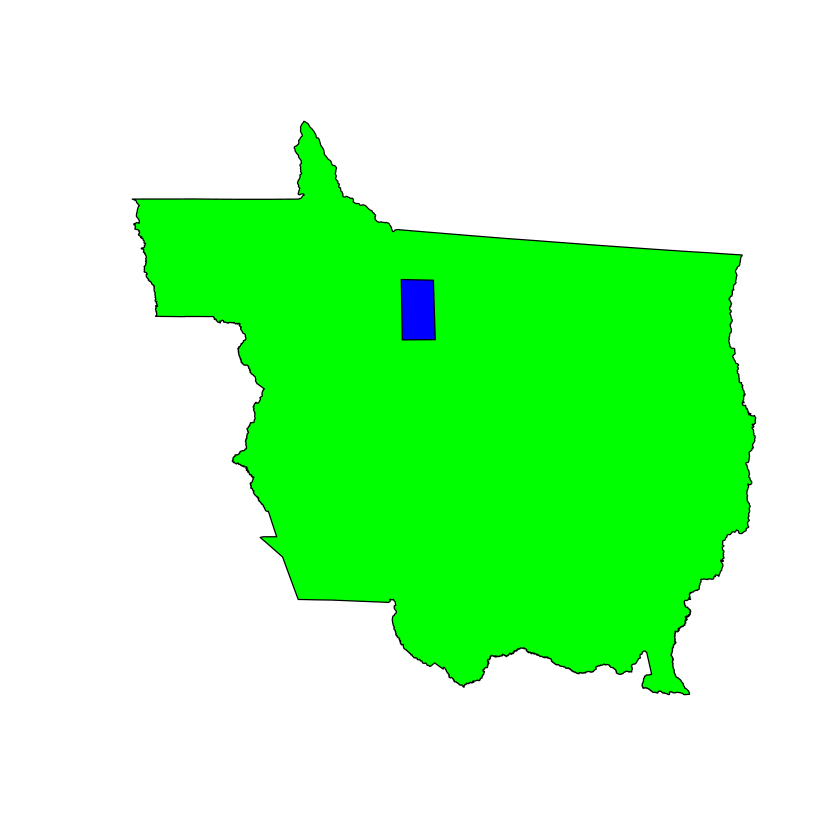

In [4]:
library(tidyverse)
library(sf)

mt <- st_read(system.file("extdata/MT/shape/MT.shp", package = "inSitu")) 
g <- st_read(paste0(getwd(), "/geom/geom.shp"))

plot(c(mt$geometry, g$geometry),  col = c('green', 'blue'))

Com a área de interesse e o serviço de séries temporais definida, é preciso completar quais bandas serão usadas e de qual produto. No exemplo abaixo, será usada as mesmas bandas definida na Obtenção das Amostras para manter a coerência dos dados e imagens do produto MOD13Q1 do sensor MODIS. Logo abaixo, é definido a função 'sits_coverage':


<!-- Neste exemplo será usado o serviço 'EOCubes', informado através do parâmetro 'service'. Outros parâmetros são a coverage, será utilizado o produto MOD13Q1 do sensor MODIS, as bandas (as mesmas bandas definidas na Obtenção de Amostras) e um shapely que corresponde a área de interesse para ser usado como dados de entrada no classificador. A área de interesse (em azul) corresponde uma pequena região do Estado do Mato Grosso (em verde), entre São José do Apui e Novo Paraná, como pode ser observado logo abaixo: -->

In [ ]:
cov.tb <- sits_coverage(service = "EOCUBES",
                        name = "MOD13Q1/006",
                        bands = bands,
                        geom = sf::read_sf(paste0(getwd(), "/geom/geom.shp"))

## Classificação

Existem três tipos de classificadores existentes neste versão do pacote sits. Neste exemplo, será abordado somente o 'sits_classify_cubes' já que está função é específica para trabalhar com o serviço 'EOCubes', definida na coverage anteriormente. Esse classificador irá resultar um conjunto de imagens raster no diretório definido pelo argumento 'file' da função. Os outros argumentos da função são a coverage e o modelo de aprendizagem de máquina definidos anteriormente, e o máximo de memória e processadores permitido o sits usar.


<!-- Nesta versão do sits está disponível três tipos de classificadores diferente. Como foi definido o serviço 'EOCubes' no 'sits_coverage', é necessário utilizar a função 'sits_classify_cubes' que é próprio para trabalhar com cubos de dados. Esse classificador irá gerar como resultado um conjunto de imagens RASTER em um diretório que deve ser específicado no argumento 'file'. Os outros parâmetros são a coverage e o modelo que foram definidos anteriormente e a quantidade de memória (em GB) e de processadores máximo permitido para ser usado. -->


In [ ]:
if (!dir.exists(paste0(getwd(), "/Classification/MT")))
  dir.create(paste0(getwd(), "/Classification/MT"), recursive = TRUE)

rasters.tb <- sits_classify_cubes(file = paste0(getwd(), "/Classification/MT"),
                                  coverage = cov.tb,
                                  ml_model = ml_model,
                                  memsize = 4,
                                  multicores = 4)

<!--  -->

Esse processo após finalizado poderá ser repetido, porém as imagens raster de resultado da segunda execução serão diferentes da primeira. Caso queira realizar o teste, aconselho mover ou alterar o nome da pasta definida anteriormente pelo código 'paste0(getwd(), "/Classification/MT")' e depois utilizar o software QGIS para comparar as imagens do mesmo tempo.

As imagens de raster serão diferentes devido ao processo de treinamento da MLP que utiliza uma semente da execução aleatória para inicializar a configuração da rede. A cada nova execução, uma nova semente será usada o que torna o modelo da rede neural diferente e, consequentemente, altera o resultado final.

No proxímo passo, será demonstrado como tornar esse script reprodutível usando o pacote sits.rep.

## **Script Reprodutível**

Depois de finalizado o desenvolvimento de um script de classificação, um arquivo de extensão '.R' contendo todo o código escrito deverá ser encontrado em seu ambiente de trabalho. É de suma importância conhecer o caminho de diretório deste script, para que se possa reproduzí-lo nos próximos passos. 

Logo abaixo, é demonstrado a localização do script de classificação que será usado nos exemplo a seguir. Ao analisar este arquivo, poderá perceber que contém os mesmos códigos descritos na fase do Script Não Reprodutível.

<!-- ele deverá estar armazenado em um arquivo com extensão '.R'. Abaixo, é demonstrado a localização do script no diretório local. Ao analisar este arquivo, poderá perceber que contém os mesmos códigos descritos na fase do Script Não Reprodutível. -->

<!-- 
Essa etapa o pesquisador desenvolve um script que será executado pelo sits.rep para armazenar os resultados. Neste exemplo, é explicado quais são as principais partes que um script de classificação deve conter para ser reproduzido. Durante a execução, é coletado o seu contexto que inclui parâmetros de entrada das funções, a semente do gerador de números aleatórios, o modelo treinado, o código original, resultados, informações de sistema operacional, dependências e o ambiente de programação.

Todos os dados de entrada usado pelos pesquisadores para treinar um modelo e classificar séries temporais, possuem versionamentos e estruturas de dados bem definidas pelos pacotes inSitu e EOCubes. Desde que esses dados se encontram hospedados em serviços web e são explicitamente versionados, é possível recuperar exatamente a mesma versão dos dados usadas no treinamento e classificações. Por tanto, não sendo necessário armazená-los para garantir a reprodutibilidade, bastando coletar as versões de ambos os pacotes.

O script que iremos utilizar a partir de agora se encontra no caminho a seguir:
 -->

In [2]:
script <- paste0(getwd(), "/classification.R")
script

[1] "/home/rafael/workspace/sits.rep/jupyter/classification.R"

<!--  -->

Para tornar este script reprodutível, é necessário executá-lo através da biblioteca sits.rep. Foi desenvolvida uma função específica para tratar o processo de classificação, no qual irá armazenar em tempo de execução a semente aleatória e metadados para que se possa sempre reproduzir os mesmos resultados. Além disso, essa função foi construída para que seja possível modularizar experimentos pós classificação, crescendo em forma de árvore.


<!-- Essa biblioteca foi desenvolvida com o objetivo de facilitar a modularização dos experimentos.  -->


<!-- Para tornar este script reprodutível, é necessário importar a biblioteca sits.rep e utilizar uma função específica para tratar o processo de classificação. Essa função irá armazenar a semente, dados e metadados durante a execução para que seja possível reproduzir sempre as mesma imagens raster de resultados. Além disso, essa função foi construída para que seja possível modularizar os experimento e tornar esse processo mais dinâmico.  -->

Para isso, é necessário informar um nome do diretório que será criado para armazenar o experimento de classificação e o caminho do script. Neste exemplo, esse diretório será chamado de 'deep_learning'. Logo abaixo, é executado a função 'sits.rep_classify()' que irá executar script e armazenar seus metadados:


<!-- Depois, basta importar para a memória do R: -->

In [6]:
library(sits.rep)

sits.rep_classify("deep_learning", script)

<!-- O sits.rep disponibiliza duas funções, sendo uma para executar as classificações e outra para reproduzir. Focaremos nesse momento na função de classificação. -->

## Estrutura de armazenamento dos experimento pelo sits.rep

Durante a execução do script, metadados serão criados no diretório com o nome definido pelo usuário. Todos os dados serão armazenados a partir do diretório 'sits.rep' criada na raiz do sistema. Na imagem a seguir é demonstrada a estrutura criada pelo pacote.

No Nível 1 serão armazenadas todos os diretórios iniciais criado pela função 'sits.rep_classify'. Esse diretório é chamado de árvore por armazenar todos os ramos de experimentos, demonstrado no Nível 2 na imagem, realizados ao longo do processo de análise de dados. Como uma árvore só pode ser criada através da função 'sits.rep_classify', ela irá ter somente uma classificação em todo seu ciclo de vida. Além disso, o Nível 2 irá conter um diretório chamado de Reprodutível que será detalhado posteriormente.

No Nível 3 irá conter os metadados, resultados da execução e o script do experimento, com exceção do diretório Reprodutível. A partir dos resultados obtidos na execução, será criado um arquivo contendo um valor hash para cada imagem raster. Esse arquivo será responsável para posteriormente o sits.rep verificar se os resultados reproduzidos são iguais aos originais. 

<!-- Para validar se os resultados foram os mesmos  -->

<!-- No Nível 2 irá conter todos os experimentos criados na árvore e um diretório chamado Reprodutível, que será detalhado posteriormente.  -->


<!-- Toda execução realizada pelo sits.rep é chamado de experimento. Para cada execução dos experimentos, será criado uma relação de árvore de dependências. Por padrão, a classificação sempre é raiz de uma árvore e única, logo, não irá existir duas classificações na mesma árvore. Futuramente será incluido a possibilidade de tratar o pós processamento, e nesse caso, esse experimento irá necessáriamente depender de um processo pai criado anteriormente, seja uma classificação ou outro experimento de pós processamento. Dessa forma, o sits.rep irá automaticamente incluir como dado de entrada no pós-processamento, o resultado do experimento pai. -->

<!-- A função para classificação do sits.rep (chamado de 'sits.rep_classify') recebe dois parâmetros de entrada: um nome único para árvore e um script de classificação. Como resultado dessa função, será criado um diretório com o nome da árvore e, dentro desse diretório, conterá experimentos de classificação e, futuramente, de pós-processamento. A imagem abaixo exemplifica essa estrutura de diretório. A árvore 'arv_1' possuí três experimentos: uma classificação e dois de pós-processamento (pos_bayes, mosaico). A ligação de parentesco entre os experimentos é dado pelo arquivo 'grafo.txt'. Dentro de cada experimento deverá conter uma cópia do script, o resultado da execução, um hash dos resultados, arquivo de contexto e outros dados particulares de cada execução. O arquivo de hash dos resultados será usado na fase de [Reprodução dos Resultados](#Reprodução-dos-Resultados) para que, após reproduzir o experimento, verificar se os resultados são iguais. O diretório reprodutível será abordado na seção [Reprodução dos Resultados](#Reprodução-dos-Resultados). -->




<!-- Logo abaixo, é executado a função para classificação. O primeiro argumento é o nome da árvore que irá se chamar 'arv_1' e o segundo é o script. -->

![alt text](img/arvore_dependencia.png "Estrutura de diretório organizado pelo sits.rep")


<!-- # sits.rep_classify("arv_1", script) -->

Finalizado a execução, é possível visualizar a árvore e o experimento armazenado no diretório padrão '~/sits.rep'.

In [9]:
list.dirs('~/sits.rep', recursive = TRUE)

[1] "/home/rafael/sits.rep"                                       
 [2] "/home/rafael/sits.rep/arv_1"                                 
 [3] "/home/rafael/sits.rep/arv_1/classification"                  
 [4] "/home/rafael/sits.rep/arv_1/classification/Classification"   
 [5] "/home/rafael/sits.rep/arv_1/classification/Classification/MT"
 [6] "/home/rafael/sits.rep/arv_1/classification/coverage"         
 [7] "/home/rafael/sits.rep/arv_1/classification/coverage/geom"    
 [8] "/home/rafael/sits.rep/arv_1/classification/result"           
 [9] "/home/rafael/sits.rep/arv_1/classification/result/raster"    
[10] "/home/rafael/sits.rep/arv_1/classification/result/rds"       
[11] "/home/rafael/sits.rep/arv_1/classification/train"

## Reprodução do Experimento de Classificação

Após finalizado a execução do experimento de classificação, é possível criar um script reprodutível a partir dos metadados armazenados e reproduzí-lo em um container Docker. Esse script será responsável por inserir a semente da execução, verificar se os dados foram reprodutíveis e preparar o ambiente para a execução do script de classificação original. 

Para isso, o sits.rep disponibiliza a função 'sits.rep_reproduce' que recebe como entrada o nome de uma árvore existente, nome de um experimento presente nesta árvore escolhida e um nome de diretório que será criado no diretório Reprodutível, presente no Nível 2, para armazenar os metadados do script reprodutível. Na imagem abaixo é demonstrado a estrutura do diretório Reprodutível e, para este exemplo, o nome 'Classificação_rep' será usado para representar o novo diretório criado pela função 'sits.rep_reproduce'. 



<!-- como demonstrado na imagem abaixo.  -->

<!-- Esse diretório criado irá conter  -->

<!-- Para isso, o sits.rep disponibiliza a função 'sits.rep_reproduce' que 

Após finalizado a execução do experimento, o sits.rep permite criar um script reprodutível para que outras pessoas possam reproduzí-lo em um container Docker. 



executado em um container do Docker. 


O sits.rep disponibiliza a função 'sits.rep_reproduce' que irá criar scripts, metadados, Dockerfile e copiar o arquivo de hash para reproduzir e verificar os resultados. O arquivo de Dockerfile irá conter todas as informações de dependências de sistema operacional e de pacotes de linguagem de programação, para um container possa ser criado simulando o ambiente original. Na imagem a seguir é demonstrado a estrutura do diretório após a execução da função 'sits.rep_reproduce'.
 -->


![alt text](img/rep-docker.png "Title")

Logo abaixo, é executado a função 'sits.rep_reproduce' sobre o experimento de Classificação presente na árvore Deep_learning. Os dados reprodutíveis serão armazenados no diretório Classificacao_rep na raíz do diretório Reprodutível: 
<!-- Para executar o 'sits_rep.reproduce', é necessário informar o nome do experimento, juntamente com a sua árvore, e o nome do diretório aonde será armazenado o script e os dados para a reprodução. Logo abaixo, é demonstrado o uso da função 'sits.rep_reproduce': -->


In [ ]:
sits.rep::sits.rep_reproduce("Deep_learning", "classification", "Classificacao_rep")

Finalizado a execução, o pesquisador poderá carregar este novo diretório em uma base de dados aberta e acompanhar um texto científico em suas publicações para que outras pessoas possam reproduzir o experimento de classificação. Para reproduzir o resultado, basta executar o comando 'docker build' sobre o diretório em uma máquina que possua a tecnologia Docker instalado. Logo abaixo é demonstrado a reprodução da classificação usando a tecnologia Docker, criando a imagem 'rep_in_jupyter' que irá executar o script reprodutível automaticamente e retornar para o usuário os resultados foram iguais ou não:

<!-- Esta tecnologia permite virtualizar ambientes computacionais controlados e executar scripts. O ambiente computacional é criado através dos dados de contexto obtidos durante a execução dos scripts que se materializou em um Dockerfile. Por tanto, são instaladas todas as dependências de sistema operacional, pacotes, com as suas respectivas versões no momento da execução original, além de configurar a semente do gerador de números aleatórios e outras informações de sistema.  Nesta máquina virtual, o script reprodutível é executado e é criado um arquivo hash reprodutível dos resultados. No final do processo, o arquivo hash original é comparado com o arquivo reprodutível, para verificar se os resultados produzidos são exatamente os mesmos do experimento original. -->

<!-- No comando abaixo é criado uma imagem chamado 'rep_in_jupyter' que irá executar o script reprodutível automaticamente: -->

In [7]:
base::system("docker build -t rep_in_jupyter /home/rafael/sits.rep/arv_1/reproducible/rep_deeplearnings")

<!-- O container irá instalar as depêndencias do pacote, executar o script reprodutível e verificar o resultado. Será imprimido no terminal se o resultado foi ou não reprodutível. -->

<!-- Referencias:
\cite{doi:10.1198/106186007X178663, 10.7717/peerj.148, Boettiger:2015:IDR:2723872.2723882, doi:10.1111/tgis.12195}
et al \cite{gertler2018make} 
\cite{doi:10.1029/2012EO160003, doi:10.1002/2015EA000136}
https://www.okhub.org/ (propósito geral)

https://github.com/geosec/knowledge_hub
http://www.esensing.org/
nust2017opening
https://www.earthobservations.org/article.php?id=366
artigo_alber

\cite{10.1371/journal.pmed.0020124, prinz2011believe, baker20161}
\cite{reich2006genepattern, greff2017sacred, nust2017opening, govoni2019qresp} -->

<!-- 
Os dados de contexto são capturados através de sobrescrita, em tempo de execução, das principais funções presentes nos pacotes sits e base do R. Quando um script é executado pelo 'sits.rep_classify', devido às funções sobrescritas serem inicialmente carregadas na memória global do R, as funções do sits.rep serão utilizadas em vez das funções originais do sits. As funções sobrescritas capturam os parâmetros de entrada, armazenam em um repositório, e no final usam as respectivas funções originais, passando os mesmos parâmetros de entrada, para que o seu resultado seja retornado e o processamento prossiga como se a sobrecarga não existisse.

Para exemplificar essa idéia, logo abaixo iremos sobrescrever a função 'sits_coverage' do pacote sits. Essa função recebe quatro argumentos de entrada:  -->

<!-- sits_coverage(service = "EOCUBES",
              name = "MOD13Q1/006",
              bands = "ndvi",
              geom = sf::read_sf(paste0(getwd(), "/geom/geom.shp"))) -->

<!-- Para sobrescrever o 'sits_coverage', é necessário criar uma função com a mesma assinatura, ou seja, com o mesmo nome da função e quantidade de argumentos. No interior da função sobrescrita, é possível analisar os valores de cada parâmetro para tomar alguma decisão, por exemplo, armazenar esses parâmetros. Neste exemplo, o valor de cada parâmetro será impresso no terminal. O seu retorno deve ser o resultado da função original para que o processamento pode ser seguido como se a sobrecarga não existisse. Assim, é chamado a função original (acessado através do nome do pacote seguido por '::') para que o seu resultado seja o retorno da função sobrescrita. 

Logo abaixo é exemplificado essa idéia sobrescrevendo o 'sits_coverage' com o propósito de imprimir no terminal o valor armazenado por cada argumento da função e no final é retornado o resultado da função original presente no sits: -->

<!-- sits_coverage <- function(service, name, bands, geom){
    print(service)
    print(name)
    print(bands)
    print(geom)
    
    return(sits::sits_coverage(service = service, name = name, bands = bands, geom = geom)) 
} -->

<!-- Agora, ao executar a função 'sits_coverage' é impresso impresso os argumentos e o resultado original do 'sits_coverage': -->

<!-- sits_coverage(service = "EOCUBES",
              name = "MOD13Q1/006",
              bands = "ndvi",
              geom = sf::read_sf(paste0(getwd(), "/geom/geom.shp"))) -->

<!-- Esse exemplo demonstra o que o sits.rep faz internamente. Nem todas as funções do sits são sobrescritas, depende da necessidade de armazenar um dado específico. 
Os parâmetro da função sobrescrita não são modificados, para que o resultado final possa ser o mesmo da sua contraparte original.  -->